# Ordinary Differential Equations

A **differential equation** is a relationship between a function, $f(x)$, its independent variable, $x$, and any number of its derivatives.

An **ordinary differential equation** or **ODE** is a differential equation where the independent variable, and therefore also the derivatives, is in one dimension. An ODE can be written as:

$$
F\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \frac{d^3f(x)}{dx^3}, \ldots, \frac{d^{n-1}f(x)}{dx^{n-1}}\right) = \frac{d^{n}f(x)}{dx^{n}},
$$

where $F$ is an arbitrary function that incorporates one or all of the input arguments, and $n$ is the **order** of the differential equation.

This equation is referred to as an **$n^{\mathrm{th}}$ order ODE**.


**Reference:**

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.00-ODE-Initial-Value-Problems.html

## Initial value problems:


A common set of known values for an ODE solution is the **initial value**.

For an ODE of order $n$, the initial value is a known value for the $0^{\mathrm{th}}$ to $(n-1)^{\mathrm{th}}$ derivatives at $x = 0, f(0), f^{(1)}(0), f^{(2)}(0),\ldots, f^{(n-1)}(0)$.

For a certain class of ordinary differential equations, the initial value is sufficient to find a unique particular solution. Finding a solution to an ODE given an initial value is called the **initial value problem**. Although the name suggests we will only cover ODEs that evolve in time, initial value problems can also include systems that evolve in other dimensions such as space.

## 1. Solving ODEs using sympy (symbolic algebra):

We can use **dsolve()**, which solves any (supported) kind of ordinary differential equation and system of ordinary differential equations.

**Documentation:**

https://docs.sympy.org/latest/modules/solvers/ode.html

In [1]:
import sympy as sp

# To see the outputs in latex format
from sympy.interactive import printing
printing.init_printing(use_latex = True)

## Example 1:

Find the solution to:

$\frac{𝑑^2𝑓(𝑥)}{dx^2}−2𝑓(𝑥)=0$

In [2]:
# We define symbols for variables and functions:

# For variable x:
x = sp.Symbol('x')

# For function f(x):
f = sp.Function('f')(x)

In [8]:
print(x)
print(f)
print("\n")
display(x)
display(f)

x
f(x)




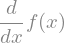

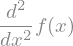

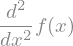

Derivative(f(x), x)


In [10]:
# Derivatives:

der_f1 = f.diff(x)

# 2 options
der_f2 = f.diff(x, x)
der_f2b = f.diff(x, 2) # indicating order

display(der_f1)
display(der_f2)
display(der_f2b)

print(der_f1)

We want to define this ODE:

$\frac{𝑑^2𝑓(𝑥)}{dx^2}−2𝑓(𝑥)=0$

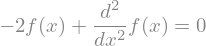

Eq(-2*f(x) + Derivative(f(x), (x, 2)), 0)


In [11]:
# Differential equation:

diffeq = sp.Eq(der_f2 - 2*f, 0)

display(diffeq)

print(diffeq)

In [12]:
# Now, we find the solution:

result = sp.dsolve(diffeq, f)

display(result)

### Example 2: 

Find the solution to:


$\frac{𝑑^2f(x)}{dx^2}+𝑓(𝑥)=0$

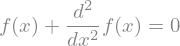

In [13]:
diffeq2 = sp.Eq(f.diff(x,2) + f, 0)

display(diffeq2)

In [14]:
result2 = sp.dsolve(diffeq2, f)

display(result2)

### Example 3:

Find the solution to:

$\sin(x)\cos(f(x))+\sin(f(x))\cos(x)\frac{d}{dx}f(x)=0$

In [16]:
from sympy import sin, cos

In [17]:
f = sp.Function('f')

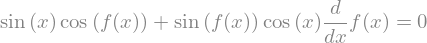

In [18]:
diffeq3 = sp.Eq(sin(x)*cos(f(x)) + sin(f(x))*cos(x)*f(x).diff(x), 0)

display(diffeq3)

In [23]:
from sympy import classify_ode


In [24]:
classify_ode(sp.Eq(sin(x)*cos(f(x)) + sin(f(x))*cos(x)*f(x).diff(x), 0), f(x))

('factorable',
 'separable',
 '1st_exact',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 'almost_linear_Integral')

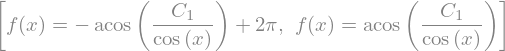

In [20]:
result3 = sp.dsolve(diffeq3, hint="1st_exact")

display(result3)

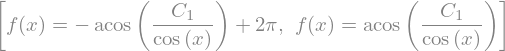

In [21]:
result3_2 = sp.dsolve(diffeq3, hint="almost_linear")

display(result3_2)

### Example 4 (initial value problem):

Find the solution to:

$\frac{d}{dt}y(t) + \frac{y(t)}{20} - 10 = 0$

with $y(t=0) = 20$.

In [25]:
# We define symbols:

t = sp.Symbol('t')
y = sp.Function('y')

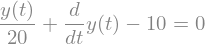

In [26]:
# We define the ODE:

diffeq4 = sp.Eq(y(t).diff(t) + y(t)/20 - 10,0)

display(diffeq4)

In [27]:
# Solution to the ODE:

result4 = sp.dsolve(diffeq4, y(t), ics = {y(0):20})

display(result4)

## Systems of ODEs


We can use **dsolve()** or **dsolve_system**.

### Example 5 (using dsolve) :

Find the solution to:

$x'(t) = x(t)y(t)\sin(t)$

$y'(t) = y^2(t)\sin(t)$


In [28]:
# We define symbols:

t = sp.symbols('t')

x, y = sp.symbols('x, y', cls=sp.Function)

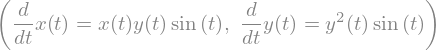

In [29]:
# Differential equations:

diffeqs5 = (sp.Eq(x(t).diff(t), x(t)*y(t)*sin(t)), sp.Eq(y(t).diff(t), y(t)**2*sin(t)))

display(diffeqs5)


$x'(t) = x(t)y(t)\sin(t)$

$y'(t) = y^2(t)\sin(t)$

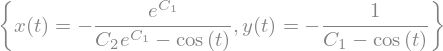

In [30]:
# Solution to the ODEs:

result5 = sp.dsolve(diffeqs5)

display(result5)

### Example 6 (using dsolve_system) :

Find the solution to:

$x'(t) = y(t)$

$y'(t) = x(t)$

In [31]:
from sympy.solvers.ode.systems import dsolve_system

In [32]:
# Symbols, variables and functions

t = sp.symbols("t")
x, y = sp.symbols("x y", cls=sp.Function)

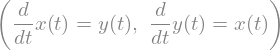

In [33]:
# SYSTEM OF ODES

diffeqs6 = (sp.Eq(x(t).diff(t), y(t)), sp.Eq(y(t).diff(t), x(t)))

display(diffeqs6)


In [34]:
# Solution to the ODEs:

result6 = dsolve_system(diffeqs6)

display(result6)

### Example 7 (using dsolve_system with initial value) :

Find the solution to:

$x'(t) = y(t)$

$y'(t) = x(t)$

with:

$x(0) = 1$

$y(0) = 0$


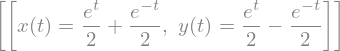

In [35]:
# Solution to the ODEs:

result7 = dsolve_system(diffeqs6, ics = {x(0): 1, y(0): 0})

display(result7)

### Example 8 (using dsolve_system with initial value) :

Find the solution to:

$(f'(x))^2 = g^2(x)$

$g'(x) = g(x)$


In [36]:
# Symbols:

x = sp.symbols("x")

# Functions:
f, g = sp.symbols("f g", cls=sp.Function)

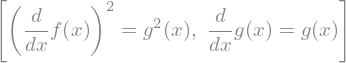

In [39]:
sys_deqs8 = [sp.Eq(f(x).diff(x)**2, g(x)**2), sp.Eq(g(x).diff(x), g(x))]

display(sys_deqs8 )

In [40]:
result8 = dsolve_system(sys_deqs8)

display(result8)

## Verification:

In [41]:
from sympy import checkodesol

In [44]:
display(result8[0])
display(result8[1])

In [43]:
check_odes8 = checkodesol(sys_deqs8, result8[0])

print(check_odes8)

(True, [0, 0])


In [45]:
check_odes8 = checkodesol(sys_deqs8, result8[1])

print(check_odes8)

(True, [0, 0])
